# VVV Machine Analysis Samples size 2.5k

In [1]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features, union)

## 1. Load Data

In [2]:
start = time.time()

path = "/home/data/carpyncho/stored/samples/2.5k/"
data = container.read(path)

print("Removing b220...")
del data["b220"]

Loading '/home/data/carpyncho/stored/samples/2.5k/b220_sample2.5k.npy'...
Loading '/home/data/carpyncho/stored/samples/2.5k/b264_sample2.5k.npy'...
Loading '/home/data/carpyncho/stored/samples/2.5k/b278_sample2.5k.npy'...
Loading '/home/data/carpyncho/stored/samples/2.5k/b263_sample2.5k.npy'...
Loading '/home/data/carpyncho/stored/samples/2.5k/b261_sample2.5k.npy'...
Loading '/home/data/carpyncho/stored/samples/2.5k/b262_sample2.5k.npy'...
Removing b220...


##  2. Preprocess

### 2.1. Discretize the classes

In [3]:
data, classes, sclasses = discretize_classes(data)

### 2.2. Removes all low-variance and "bad" features

In [4]:
X_columns = clean_features(data, "b278")
print("Total features:", X_columns.size)

('Total features:', 53)


### 2.3. Selected features

In [5]:
X_columns.values

array(['cnt', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2',
       'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_1',
       'Freq3_harmonics_rel_phase_2', 'Freq3_harmo

### 2.4. Group Classes

In [6]:
preserve = [k for k in classes.keys() if k.startswith("RRLyr")]
data, classes = union(data, "cls", classes, preserve, 0)
data, sclasses = union(data, "scls", sclasses, "RRLyr", 0)

d.display(d.Markdown("**Classes**"))
d.display(classes)

d.display(d.Markdown("----"))
d.display(d.Markdown("**Simplified Classes**"))
d.display(sclasses)

**Classes**

{'': 0,
 'Cep-1': 0,
 'Cep-F': 0,
 'LPV-Mira': 0,
 'LPV-OSARG': 0,
 'LPV-SRV': 0,
 'RRLyr-RRab': 6,
 'RRLyr-RRc': 7,
 'RRLyr-RRd': 8,
 'T2Cep-BLHer': 0,
 'T2Cep-RVTau': 0,
 'T2Cep-WVir': 0}

----

**Simplified Classes**

{'': 0, 'Cep': 0, 'LPV': 0, 'RRLyr': 3, 'T2Cep': 0}

In [7]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">3. b278 Vs Itself (with 10 kfolds)</h2>
</div>

### 3.1. SVM - Linear

Execute a SVM with a linear kernel. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [8]:
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses,
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time svc_linear = svc_linear("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      7140
        3.0       0.94      0.62      0.75       424

avg / total       0.98      0.98      0.97      7564

--------------------------------------------------------------------------------
CPU times: user 37.3 s, sys: 124 ms, total: 37.5 s
Wall time: 37.5 s


## 3.2. SVM - Polynomic

Execute a **SVM** with a **polynomic kernel**. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [9]:
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time svc_poly= svc_poly("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98      7140
        3.0       0.87      0.50      0.63       424

avg / total       0.97      0.97      0.96      7564

--------------------------------------------------------------------------------
CPU times: user 23.2 s, sys: 47.9 ms, total: 23.3 s
Wall time: 23.3 s


### 3.3. Random Forest

Execute a **Random Forest** with **500 c45** trees. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [10]:
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time rf = rf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      7140
        3.0       0.92      0.21      0.34       424

avg / total       0.95      0.95      0.94      7564

--------------------------------------------------------------------------------
CPU times: user 2min 40s, sys: 52 ms, total: 2min 40s
Wall time: 2min 40s


### 3.4. KNN

KNN with **3** neightbors ad weights determined by the **distance**. Docs: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [11]:
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time knn = knn("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98      7140
        3.0       0.87      0.46      0.61       424

avg / total       0.96      0.97      0.96      7564

--------------------------------------------------------------------------------
CPU times: user 11.4 s, sys: 7.98 ms, total: 11.5 s
Wall time: 11.5 s


### 3.5. Results

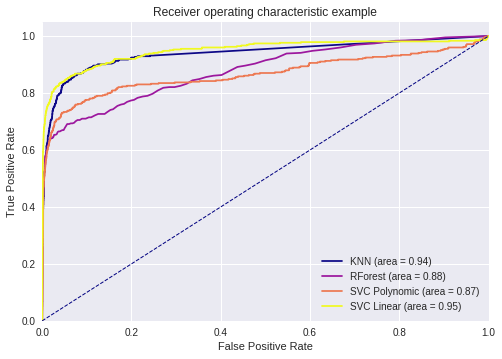

In [12]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})

----

In [13]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">4. b261 Vs. All </h2>
</div>

### 4.1. SVM - Linear

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      3862
          3       0.92      0.67      0.77       297

avg / total       0.97      0.97      0.97      4159

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      3980
          3       0.89      0.69      0.77       308

avg / total       0.97      0.97      0.97      4288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      7140
          3       0.62      0.75      0.68       424

avg / total       0.96      0.96      0.96      7564

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

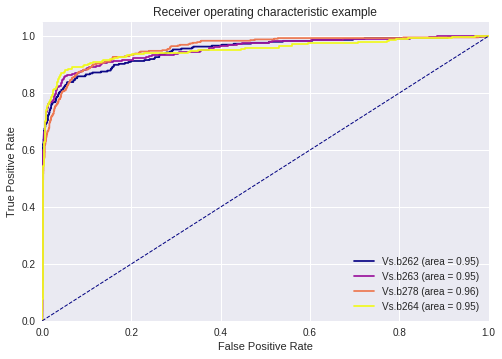

CPU times: user 3.94 s, sys: 100 ms, total: 4.04 s
Wall time: 3.93 s


In [14]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear("b261"))

### 4.2. SVM - Polynomic

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3862
          3       0.90      0.56      0.69       297

avg / total       0.96      0.96      0.96      4159

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3980
          3       0.92      0.54      0.68       308

avg / total       0.96      0.96      0.96      4288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      7140
          3       0.85      0.58      0.69       424

avg / total       0.97      0.97      0.97      7564

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

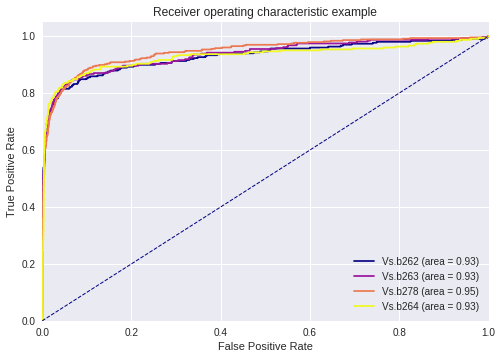

CPU times: user 3.73 s, sys: 128 ms, total: 3.86 s
Wall time: 3.72 s


In [15]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly("b261"))

### 4.3. Random Forest

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      3862
          3       0.97      0.49      0.65       297

avg / total       0.96      0.96      0.96      4159

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3980
          3       0.97      0.59      0.74       308

avg / total       0.97      0.97      0.97      4288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      7140
          3       0.88      0.07      0.12       424

avg / total       0.94      0.95      0.93      7564

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

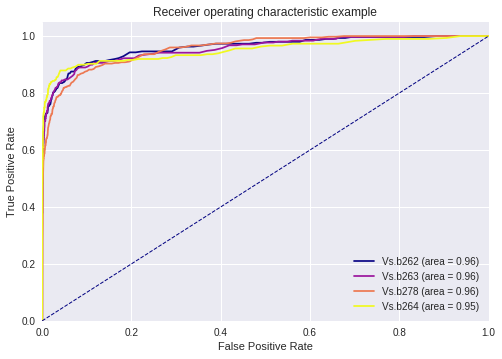

CPU times: user 37.4 s, sys: 229 ms, total: 37.6 s
Wall time: 37.2 s


In [16]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf("b261"))

### 4.4. KNN

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3862
          3       0.87      0.58      0.69       297

avg / total       0.96      0.96      0.96      4159

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      3980
          3       0.90      0.53      0.67       308

avg / total       0.96      0.96      0.96      4288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      7140
          3       0.85      0.50      0.63       424

avg / total       0.96      0.97      0.96      7564

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

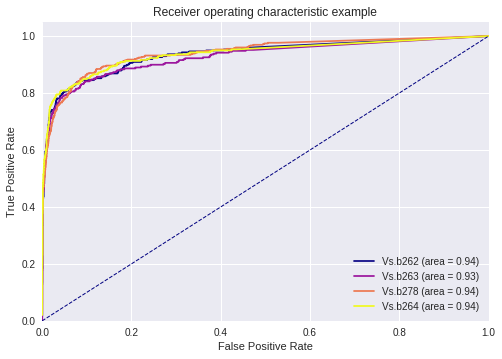

CPU times: user 12.2 s, sys: 148 ms, total: 12.4 s
Wall time: 12.2 s


In [17]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn("b261"))

In [18]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">5. b278 Vs. All </h2>
</div>

### 5.1. SVM - Linear

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3862
          3       0.97      0.55      0.70       297

avg / total       0.97      0.97      0.96      4159

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3980
          3       0.96      0.56      0.70       308

avg / total       0.97      0.97      0.96      4288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3152
          3       0.97      0.54      0.69       222

avg / total       0.97      0.97      0.96      3374

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

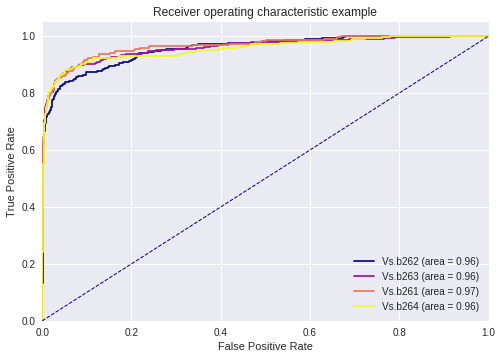

CPU times: user 19.1 s, sys: 156 ms, total: 19.3 s
Wall time: 19.2 s


In [19]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear("b278"))

### 5.2. SVM - Polynomic

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      3862
          3       0.90      0.41      0.56       297

avg / total       0.95      0.95      0.95      4159

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      3980
          3       0.93      0.46      0.62       308

avg / total       0.96      0.96      0.95      4288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3152
          3       0.82      0.30      0.44       222

avg / total       0.94      0.95      0.94      3374

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

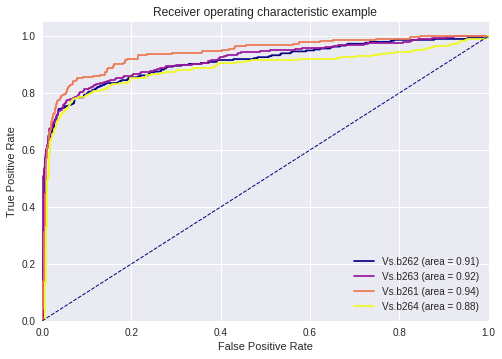

CPU times: user 12.2 s, sys: 124 ms, total: 12.3 s
Wall time: 12.2 s


In [20]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly("b278"))

### 5.3. Random Forest

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      3862
          3       0.00      0.00      0.00       297

avg / total       0.86      0.93      0.89      4159

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      3980
          3       0.00      0.00      0.00       308

avg / total       0.86      0.93      0.89      4288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.93      1.00      0.97      3152
          3       0.00      0.00      0.00       222

avg / total       0.87      0.93      0.90      3374

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

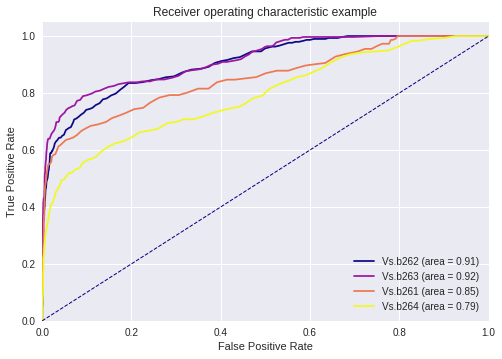

CPU times: user 1min 13s, sys: 241 ms, total: 1min 13s
Wall time: 1min 13s


In [21]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf("b278"))

### 5.4. KNN

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3862
          3       0.86      0.54      0.66       297

avg / total       0.96      0.96      0.96      4159

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      3980
          3       0.90      0.50      0.65       308

avg / total       0.96      0.96      0.96      4288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3152
          3       0.86      0.55      0.67       222

avg / total       0.96      0.96      0.96      3374

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

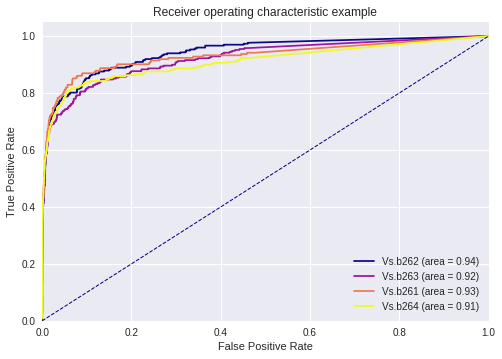

CPU times: user 27.1 s, sys: 120 ms, total: 27.3 s
Wall time: 27.1 s


In [22]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn("b278"))

In [23]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">6. b278+b261 Vs. All </h2>
</div>

### 6.1. SVM - Linear

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3862
          3       0.97      0.57      0.72       297

avg / total       0.97      0.97      0.96      4159

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3980
          3       0.96      0.59      0.73       308

avg / total       0.97      0.97      0.96      4288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2978
          3       0.96      0.53      0.69       298

avg / total       0.96      0.96      0.95      3276

--------------------------------------------------------------------------------


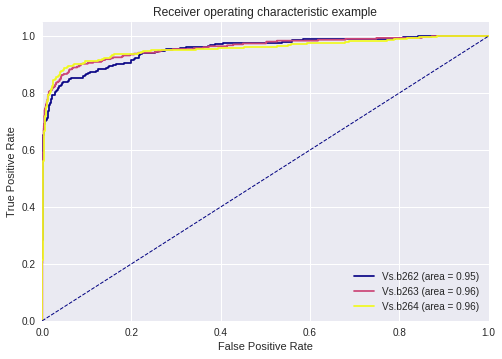

CPU times: user 31.7 s, sys: 372 ms, total: 32.1 s
Wall time: 32 s


In [24]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear(["b278", "b261"]))

### 6.2. SVM - Polynomic

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      3862
          3       0.96      0.52      0.67       297

avg / total       0.96      0.96      0.96      4159

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      3980
          3       0.93      0.53      0.67       308

avg / total       0.96      0.96      0.96      4288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      2978
          3       0.89      0.40      0.55       298

avg / total       0.94      0.94      0.93      3276

--------------------------------------------------------------------------------


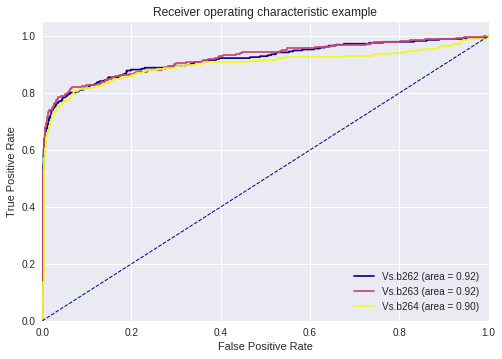

CPU times: user 20.5 s, sys: 260 ms, total: 20.8 s
Wall time: 20.7 s


In [25]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly(["b278", "b261"]))

### 6.3. Random Forest

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3862
          3       0.99      0.33      0.50       297

avg / total       0.95      0.95      0.94      4159

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      3980
          3       0.99      0.45      0.62       308

avg / total       0.96      0.96      0.95      4288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      2978
          3       0.00      0.00      0.00       298

avg / total       0.83      0.91      0.87      3276

--------------------------------------------------------------------------------


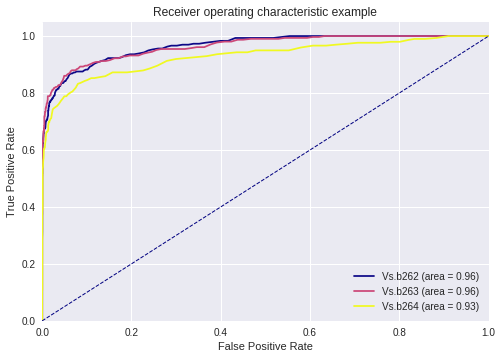

CPU times: user 1min 30s, sys: 236 ms, total: 1min 31s
Wall time: 1min 30s


In [26]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf(["b278", "b261"]))

### 6.4. KNN

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3862
          3       0.87      0.58      0.69       297

avg / total       0.96      0.96      0.96      4159

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      3980
          3       0.91      0.53      0.67       308

avg / total       0.96      0.96      0.96      4288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2978
          3       0.93      0.54      0.69       298

avg / total       0.95      0.95      0.95      3276

--------------------------------------------------------------------------------


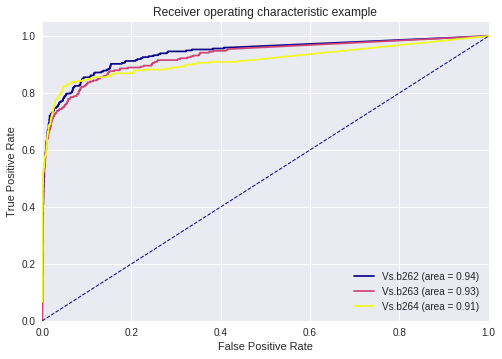

CPU times: user 36.7 s, sys: 120 ms, total: 36.9 s
Wall time: 36.8 s


In [27]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn(["b278", "b261"]))

In [28]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">7. b278+b261+b264 Vs. All </h2>
</div>

### 7.1. SVM - Linear

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3862
          3       0.95      0.63      0.76       297

avg / total       0.97      0.97      0.97      4159

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      3980
          3       0.95      0.65      0.77       308

avg / total       0.97      0.97      0.97      4288

--------------------------------------------------------------------------------


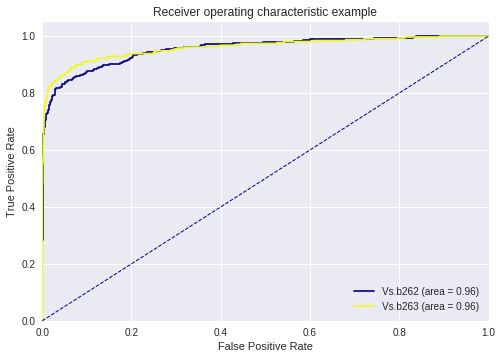

CPU times: user 37.2 s, sys: 340 ms, total: 37.6 s
Wall time: 37.5 s


In [29]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear(["b278", "b261", "b264"]))

### 7.2. SVM - Polynomic

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3862
          3       0.96      0.59      0.73       297

avg / total       0.97      0.97      0.97      4159

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3980
          3       0.95      0.56      0.70       308

avg / total       0.97      0.97      0.96      4288

--------------------------------------------------------------------------------


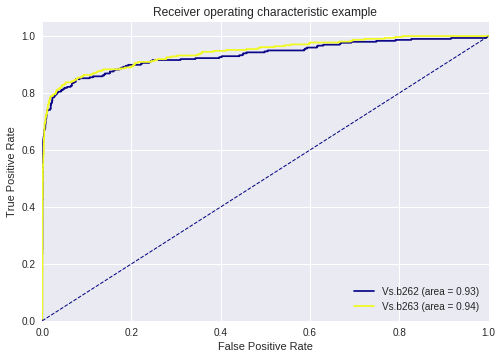

CPU times: user 25 s, sys: 372 ms, total: 25.4 s
Wall time: 25.3 s


In [30]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly(["b278", "b261", "b264"]))

### 7.3. Random Forest

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      3862
          3       0.99      0.38      0.55       297

avg / total       0.96      0.96      0.95      4159

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      3980
          3       0.98      0.62      0.76       308

avg / total       0.97      0.97      0.97      4288

--------------------------------------------------------------------------------


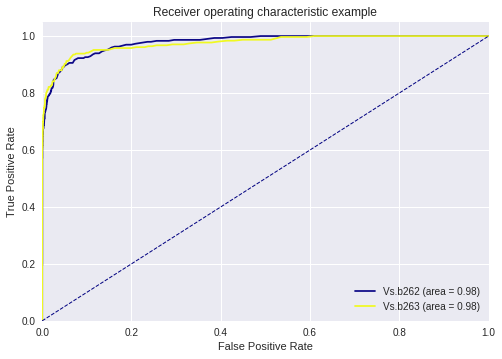

CPU times: user 1min 29s, sys: 180 ms, total: 1min 29s
Wall time: 1min 29s


In [31]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf(["b278", "b261", "b264"]))

### 7.4. KNN

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3862
          3       0.86      0.61      0.71       297

avg / total       0.96      0.97      0.96      4159

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3980
          3       0.92      0.56      0.70       308

avg / total       0.96      0.96      0.96      4288

--------------------------------------------------------------------------------


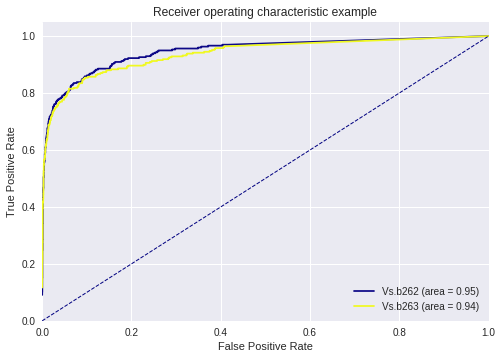

CPU times: user 34.6 s, sys: 95.9 ms, total: 34.7 s
Wall time: 34.6 s


In [32]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn(["b278", "b261", "b264"]))

In [33]:
print("Total Run Time: " + str(time.time() - start))
del start

Total Run Time: 790.82911396
